In [39]:
    import matplotlib.pyplot as plt
    import tensorflow as tf
    import numpy as np
    from keras.layers import Input, Dense
    from keras.models import Model

Creating Dataset

In [40]:
x = np.random.uniform(-20, 20, 100000)
y = 5 * x ** 3 - 10 * x ** 2 - 20 * x + 10
x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

for i in range(0,10,1):
  print(x[i],y[i], x_data[i], y_data[i])

2.945536240891421 -7.892493993534373 0.14727360924031752 0.10054450843860763
-1.0440597856756284 14.29014393848487 -0.05220862825481021 0.10110469729089622
12.234498811204134 7424.9604640929465 0.6117274098745937 0.2882499283521316
-15.38118007876025 -20242.63520118953 -0.7690733975839201 -0.41045320645149597
-14.831130038297324 -18204.457721631108 -0.7415705596837516 -0.35898212773970983
16.569424171307496 19678.483855089067 0.8284763249149663 0.5976940632619712
-6.97925604841104 -2037.3133625852972 -0.3489720656001081 0.04929456464604898
15.916266564986188 17318.54263832748 0.7958180457613124 0.5380973297383327
-14.195815044723158 -16025.081261298805 -0.709804422062688 -0.3039452830795084
-6.451979813050016 -1620.1573206711266 -0.3226079318614018 0.059829207327467104


Split the dataset into training and testing

In [41]:
size = len(x_data)
x_train, y_train = x_data[: int(size * 0.9)] , y_data[: int(size * 0.9)]
x_validation, y_validation = x_data[int(size * 0.9) : int(size * 0.95)] , y_data[int(size * 0.9) : int(size * 0.95)]
x_test , y_test = x_data[int(size * 0.95) :] , y_data[int(size * 0.95) :]

Plotting the dataset

Building the model

In [42]:
inputs = Input((1,))
x = Dense(32, activation = "relu")(inputs)
x = Dense(64, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, name = "Output_Layer")(x)

model = Model(inputs, outputs, name = "Deep_Neural_Network")
model.summary()

Model: "Deep_Neural_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [43]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [tf.keras.metrics.R2Score(name = "accuracy")], )
trained_model = model.fit(x_train, y_train, epochs = 50,  validation_data = (x_validation, y_validation), verbose = 1)
history = trained_model.history

Epoch 1/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9672 - loss: 0.0045 - val_accuracy: 0.9999 - val_loss: 1.0080e-05
Epoch 2/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9997 - loss: 3.7401e-05 - val_accuracy: 1.0000 - val_loss: 2.0612e-06
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9999 - loss: 7.6608e-06 - val_accuracy: 0.9999 - val_loss: 1.2799e-05
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9999 - loss: 1.6626e-05 - val_accuracy: 1.0000 - val_loss: 4.7699e-06
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9999 - loss: 1.1526e-05 - val_accuracy: 1.0000 - val_loss: 8.3646e-07
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9999 - loss: 1.0619e-05 - val_accuracy: 1.0000 - val_loss: 4.3048e-07
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 5.4350e-06 - val_accuracy: 1.0000 - val_loss: 9.4870e-07
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━

Plotting the training and validation accuracy

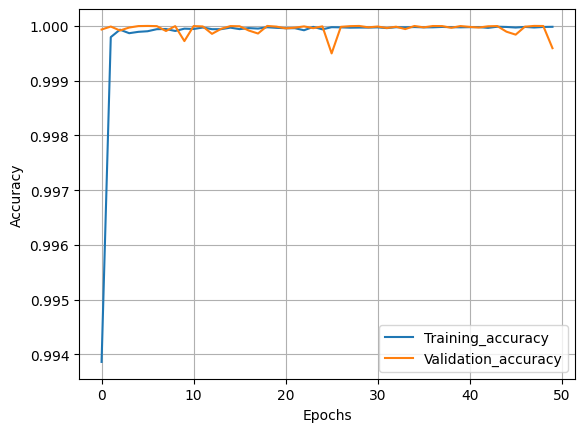

In [44]:
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_accuracy", "Validation_accuracy"])
plt.grid()
plt.show()

Plotting the training and validation loss

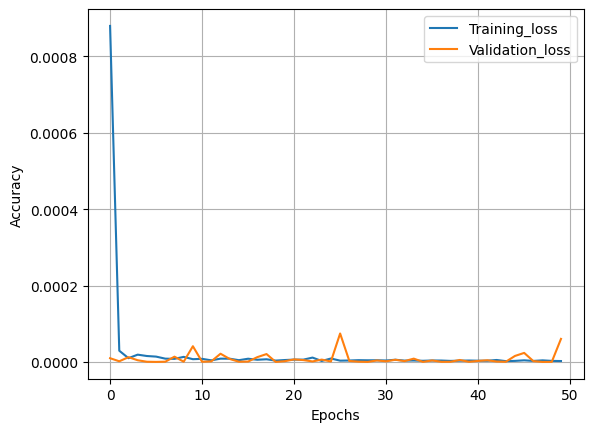

In [45]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_loss", "Validation_loss"])
plt.grid()
plt.show()

Evaluating the model

In [46]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 5.6737e-05
Test Loss: 0.0000580
Test Accuracy: 99.95985%


Making Prediction

In [47]:
predictions = model.predict(x_test)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(f"{y_test[i]:.4f}   {predictions[i][0]:.4f} ")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
OriginalY   PredictedY
=========   ==========
0.0081   0.0137 
0.1906   0.1934 
-0.4406   -0.4314 
-0.7485   -0.7288 
-0.2936   -0.2876 
0.1003   0.1030 
0.1562   0.1590 
0.5980   0.6031 
-0.1484   -0.1447 
0.9303   0.9370 


Display Prediction vs true levels

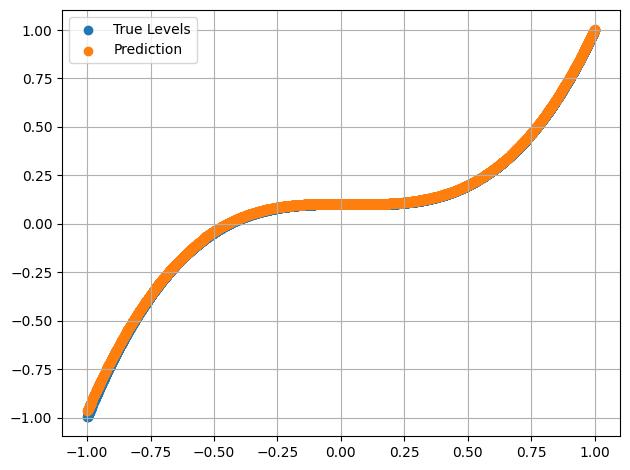

In [48]:
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.legend(["True Levels", "Prediction"])
plt.tight_layout()
plt.grid()
plt.show()